In [1]:
!pip install tensorflow


In [2]:
import tensorflow as tf
import os
import sys 

In [3]:
base_dir = 'dataset'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_real_money_dir = os.path.join(train_dir, 'real')
train_fake_money_dir = os.path.join(train_dir, 'fake')

test_real_money_dir = os.path.join(test_dir, 'real')
test_fake_money_dir = os.path.join(test_dir, 'fake')


In [4]:
BATCH_SIZE = 4
TRAIN_SIZE = 90
TEST_SIZE = 10

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(150,150,3)),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(512, activation='relu'), 

        tf.keras.layers.Dense(1, activation='sigmoid')  
    ]
)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen  = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                        batch_size=BATCH_SIZE,
                                                        class_mode='binary',
                                                        target_size=(150, 150))

Found 90 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [7]:
history = model.fit(train_generator,
                    steps_per_epoch=int(TRAIN_SIZE / BATCH_SIZE),
                    epochs=15, 
                    validation_data=test_generator, 
                    validation_steps=int(TEST_SIZE / BATCH_SIZE), 
                    verbose=2)

class PyDataset:
    def __init__(self, **kwargs):
        super().__init__(**kwargs)  # Memanggil konstruktor dari kelas induk
        # Lakukan inisialisasi kelas Anda seperti biasa
        # ...

EPOCHS = 15

train_steps_per_epoch = int(TRAIN_SIZE / BATCH_SIZE)
validation_steps = int(TEST_SIZE / BATCH_SIZE)
total_train_steps = train_steps_per_epoch * EPOCHS

history = model.fit(train_generator,
                    steps_per_epoch=train_steps_per_epoch,  # Mengulang generator train
                    epochs=15, 
                    validation_data=test_generator, 
                    validation_steps=validation_steps, 
                    verbose=2)

Epoch 1/15


C:\Users\62851\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 - 4s - 169ms/step - accuracy: 0.4419 - loss: 1.0363 - val_accuracy: 0.8750 - val_loss: 0.6756
Epoch 2/15
22/22 - 0s - 4ms/step - accuracy: 0.7500 - loss: 0.6763 - val_accuracy: 0.5000 - val_loss: 0.6684
Epoch 3/15


C:\Users\62851\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 - 1s - 66ms/step - accuracy: 0.7326 - loss: 0.6130 - val_accuracy: 0.8750 - val_loss: 0.4649
Epoch 4/15
22/22 - 0s - 3ms/step - accuracy: 0.7500 - loss: 0.5937 - val_accuracy: 1.0000 - val_loss: 0.4087
Epoch 5/15
22/22 - 1s - 68ms/step - accuracy: 0.8605 - loss: 0.3342 - val_accuracy: 1.0000 - val_loss: 0.0989
Epoch 6/15
22/22 - 0s - 3ms/step - accuracy: 1.0000 - loss: 0.0419 - val_accuracy: 1.0000 - val_loss: 0.0533
Epoch 7/15
22/22 - 1s - 62ms/step - accuracy: 0.9651 - loss: 0.2314 - val_accuracy: 0.8750 - val_loss: 0.2645
Epoch 8/15
22/22 - 0s - 3ms/step - accuracy: 1.0000 - loss: 0.0897 - val_accuracy: 1.0000 - val_loss: 0.0550
Epoch 9/15
22/22 - 1s - 63ms/step - accuracy: 0.9651 - loss: 0.0733 - val_accuracy: 0.8750 - val_loss: 0.2888
Epoch 10/15
22/22 - 0s - 3ms/step - accuracy: 1.0000 - loss: 0.1107 - val_accuracy: 1.0000 - val_loss: 4.4263e-04
Epoch 11/15
22/22 - 1s - 64ms/step - accuracy: 0.9070 - loss: 0.1670 - val_accuracy: 0.8750 - val_loss: 0.1599
Epoch 12/15
22/22 -

Text(0.5, 1.0, 'Loss in training and validation')

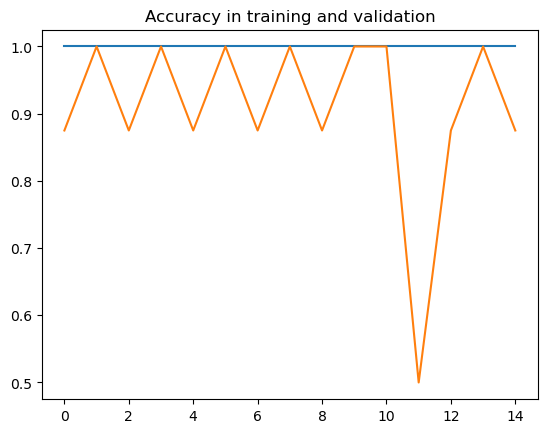

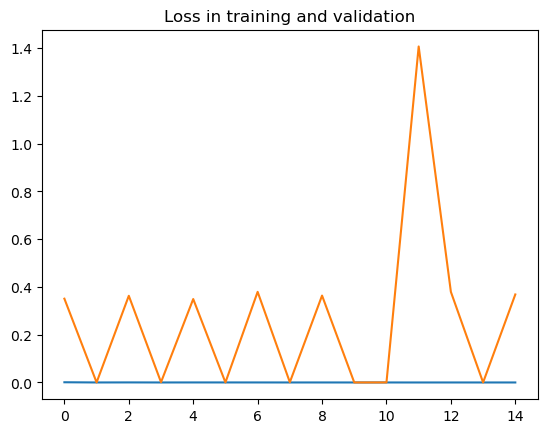

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 


# plot accuracy with matplotlib
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

# plot loss with matplotlib
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


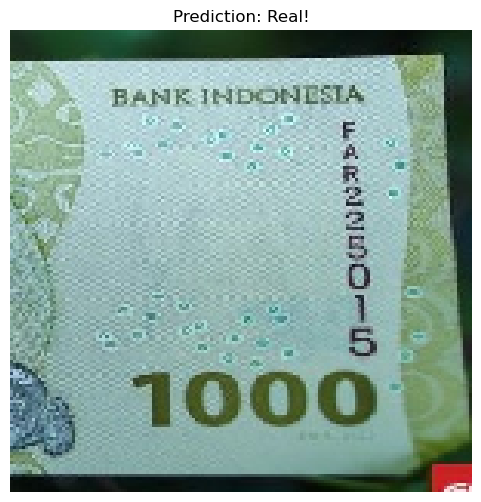

[0.9665575]
Real!


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = './sample.jpeg'
img = image.load_img(img_path, target_size=(150, 150))  # Scale the image
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Prediction
classes = model.predict(images, batch_size=10)

# Display the image with the prediction result
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')

if classes[0] > 0.5:
    plt.title("Prediction: Real!")
else:
    plt.title("Prediction: Fake!")

plt.show()

print(classes[0])
if classes[0] > 0.5:
    print("Real!")
else:
    print("Fake!")
